In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
# Carregue o arquivo (lembre-se que ele deve estar na mesma pasta)
data = pd.read_csv("heart.csv")

# Ver as primeiras linhas
print(data.head())

# Verificar se há dados nulos e os tipos de dados
print(data.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

target
1    526
0    499
Name: count, dtype: int64


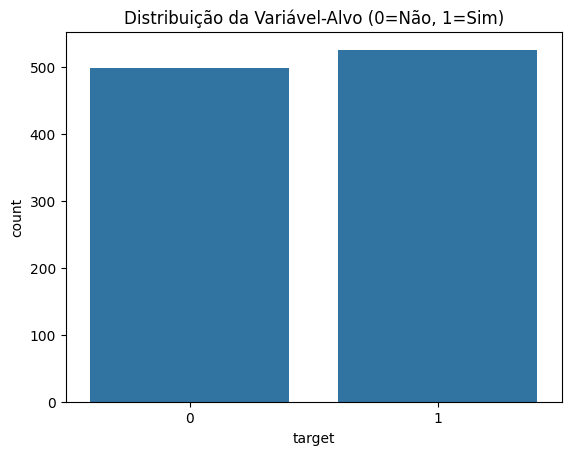

In [5]:
# Vamos verificar o balanceamento da nossa variável-alvo
print(data['target'].value_counts())

# Visualizar isso:
sns.countplot(x='target', data=data)
plt.title('Distribuição da Variável-Alvo (0=Não, 1=Sim)')
plt.show()

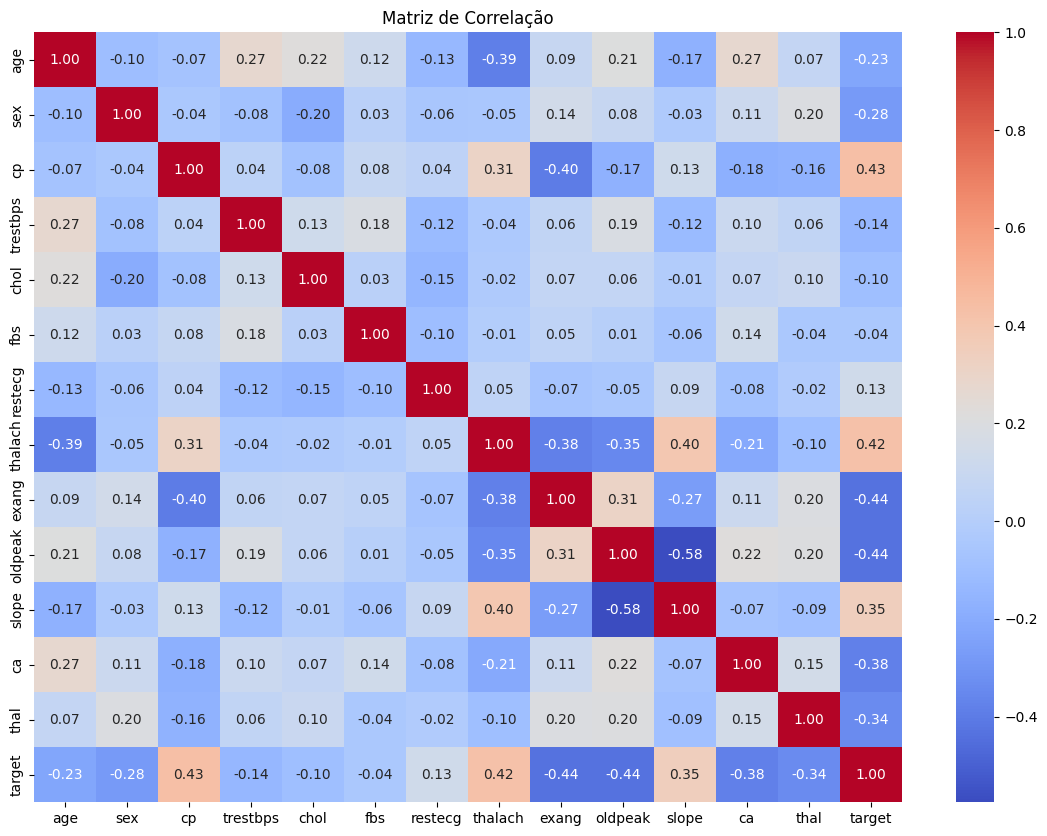

In [6]:
# Visualizar a matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [7]:
# X são todas as colunas, exceto 'target'
X = data.drop('target', axis=1)

# y é apenas a coluna 'target'
y = data['target']

In [8]:
# Vamos usar 80% para treino e 20% para teste (test_size=0.2)
# O random_state=42 garante que a divisão seja sempre a mesma, tornando nosso resultado reprodutível
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# 1. Inicializar o Scaler
scaler = StandardScaler()

# 2. Treinar o Scaler APENAS com os dados de TREINO (X_train)
# Isso calcula a média e o desvio padrão de X_train
X_train_scaled = scaler.fit_transform(X_train)

# 3. Aplicar o Scaler treinado (com a média de X_train) nos dados de TESTE
# Não usamos .fit_transform() aqui, apenas .transform()
X_test_scaled = scaler.transform(X_test)

In [10]:
# Vamos ver como ficou o primeiro paciente nos dados de treino escalonados
print("X_train (escalonado) - Primeiro paciente:")
print(X_train_scaled[0])

print("\nDimensões dos dados:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train (escalonado) - Primeiro paciente:
[ 0.81162633 -1.50996689 -0.90957214  0.31472862  0.89579058  2.34689934
  0.926946   -1.92115501 -0.71813066  0.69652503 -0.59754229  2.20730061
 -0.56245085]

Dimensões dos dados:
X_train_scaled shape: (820, 13)
X_test_scaled shape: (205, 13)


In [11]:
from tensorflow.keras import regularizers

def create_model():
    model = Sequential()

    # Camada de entrada (13 features) e primeira camada oculta (16 neurônios)
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    # Dropout para regularização
    model.add(Dropout(0.25))

    # Segunda camada oculta (8 neurônios)
    model.add(Dense(8, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    # Dropout para regularização
    model.add(Dropout(0.25))

    # Camada de SAÍDA (1 neurônio, ativação sigmoide)
    # Isso nos dará uma probabilidade entre 0 e 1
    model.add(Dense(1, activation='sigmoid'))

    # Compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Criar o modelo
model = create_model()

# Imprimir o resumo da arquitetura
print(model.summary())

/home/alejr/Documents/Heart-Diseases/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-01 13:36:09.039076: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# Treinar o modelo
# epochs=100: O modelo "verá" o dataset de treino 100 vezes
# batch_size=10: Ele atualizará os pesos a cada 10 pacientes
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test), 
                    epochs=100, 
                    batch_size=10,
                    verbose=1) # verbose=1 mostra a barra de progresso

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7683 - loss: 0.6630 - val_accuracy: 0.8244 - val_loss: 0.5977
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8159 - loss: 0.5100 - val_accuracy: 0.8146 - val_loss: 0.4186
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8573 - loss: 0.4054 - val_accuracy: 0.8585 - val_loss: 0.3639
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8671 - loss: 0.3642 - val_accuracy: 0.8537 - val_loss: 0.3451
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8720 - loss: 0.3678 - val_accuracy: 0.8634 - val_loss: 0.3353
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8744 - loss: 0.3536 - val_accuracy: 0.8732 - val_loss: 0.3265
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8817 - loss: 0.3535 - val_accuracy: 0.8732 - val_loss: 0.3225
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8805 - loss: 0.3437 - val_accuracy: 0.8780 - v

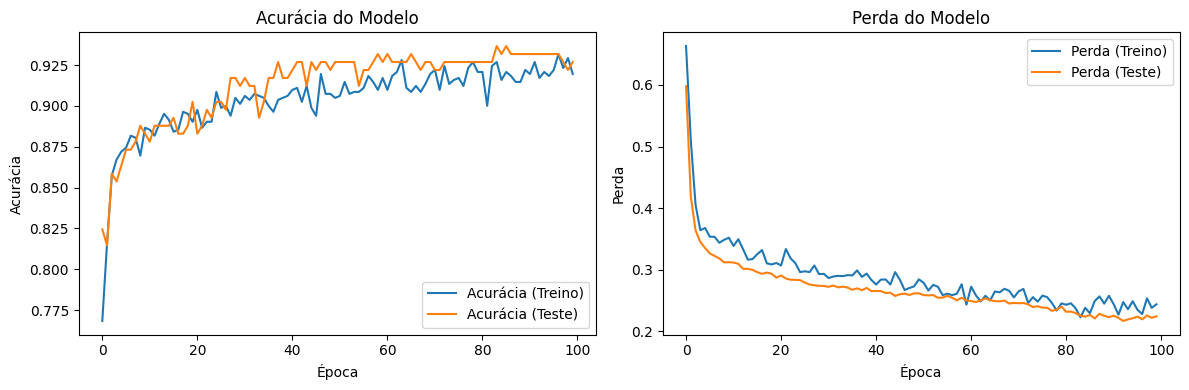

In [13]:
# Plotar a acurácia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia (Treino)')
plt.plot(history.history['val_accuracy'], label='Acurácia (Teste)')
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

# Plotar a perda (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda (Treino)')
plt.plot(history.history['val_loss'], label='Perda (Teste)')
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# O modelo 'sigmoide' retorna probabilidades (ex: 0.98, 0.05, etc.)
y_pred_probs = model.predict(X_test_scaled)

# Vamos converter essas probabilidades em classes (0 ou 1)
# Se a probabilidade for > 0.5, classificamos como 1 (doente)
y_pred = (y_pred_probs > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


--- Avaliação do Modelo ---
Acurácia Geral: 92.68%


Relatório de Classificação:
              precision    recall  f1-score   support

Saudável (0)       0.92      0.93      0.93       100
  Doente (1)       0.93      0.92      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



Matriz de Confusão:
[[93  7]
 [ 8 97]]


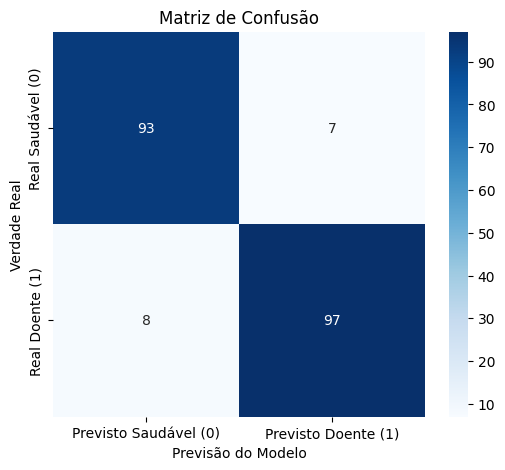

In [15]:
# 1. Acurácia
print("--- Avaliação do Modelo ---")
print(f"Acurácia Geral: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n")

# 2. Relatório de Classificação (Precisão, Recall) [cite: 33]
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Saudável (0)', 'Doente (1)']))
print("\n")

# 3. Matriz de Confusão [cite: 33]
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 4. Visualização da Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Previsto Saudável (0)', 'Previsto Doente (1)'],
            yticklabels=['Real Saudável (0)', 'Real Doente (1)'])
plt.ylabel('Verdade Real')
plt.xlabel('Previsão do Modelo')
plt.title('Matriz de Confusão')
plt.show()